CODSOFT INTERNSHIP TASK 3


*   TASK TITLE: IRIS FLOWER CLASSIFICATION
*   AUTHOR: JANANI S V
*   BATCH: MARCH 2025
*   DOMAIN: DATA SCIENCE


*  AIM: To develop a model that can classify iris flowers into different species based on their sepal and petal measurements using the given iris data set







In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import files
uploaded= files.upload()

Saving IRIS.csv to IRIS.csv


In [4]:
#calling the dataset
df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#dimensions
print(f'''No. of rows: {df.shape[0]}
No. of columns: {df.shape[1]}''')

No. of rows: 150
No. of columns: 5


In [6]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [7]:
df['species'], categories=pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Text(0.5, 1.0, 'distribution of measurements')

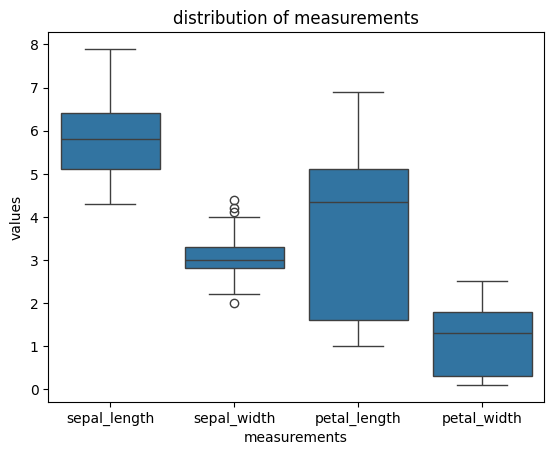

In [ ]:
#distribution of variables
df1=df.drop('species', axis=1).melt(value_vars=df.drop('species', axis=1).columns)
sns.boxplot(df1, x='variable', y='value')
plt.xlabel('measurements')
plt.ylabel('values')
plt.title('distribution of measurements')


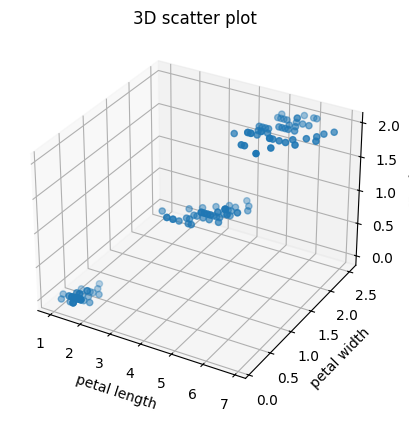

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df.petal_length, df.petal_width, df.species)
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.set_zlabel('species')
plt.title('3D scatter plot')
plt.show()

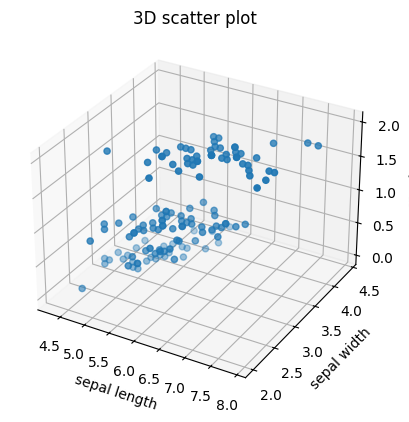

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df.sepal_length, df.sepal_width, df.species)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('species')
plt.title('3D scatter plot')
plt.show()

**Observation:** 3D plot gives us the glimpse of species of iris flower, which is more inclined towards the variables petal length and petal width

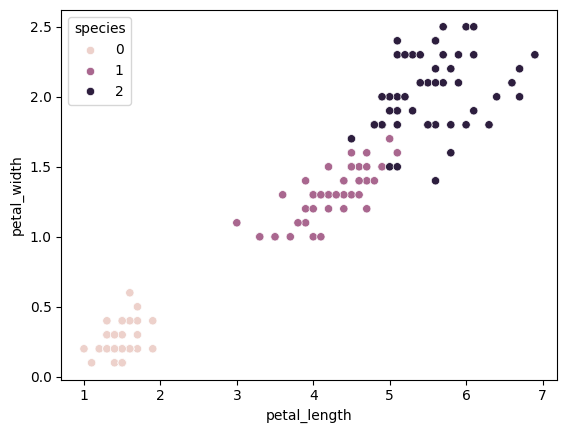

In [17]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species");

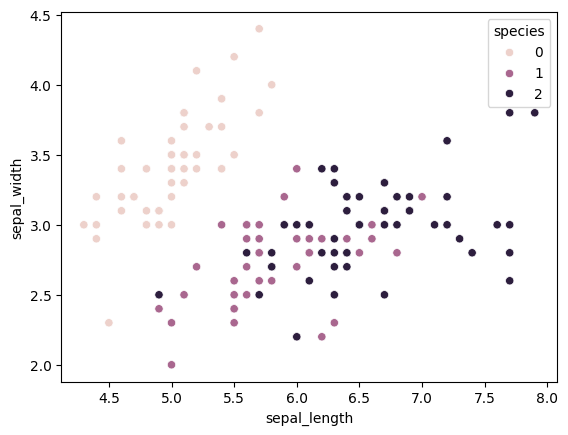

In [16]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species");

In [23]:
#forming x and y
x=df.drop('species', axis=1)
y=df['species']

In [24]:
#train-test split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=101, stratify=y)
print(f'''x train: {x_train.shape}
x test: {x_test.shape}
y train: {y_train.shape}
y test: {y_test.shape}''')

x train: (120, 4)
x test: (30, 4)
y train: (120,)
y test: (30,)


In [25]:
#scaling
preprocess=Pipeline([
    ('scaler', StandardScaler())
])

In [26]:
#model
model= Pipeline([
    ('preprocess', preprocess),
    ('classifier', LogisticRegression(multi_class='multinomial'))
                ])
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

In [27]:
#prediction
y_pred=model.predict(x_test)
y_pred

array([0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 2, 0, 2, 2])

Text(0.5, 1.0, 'confusion matrix for the classification')

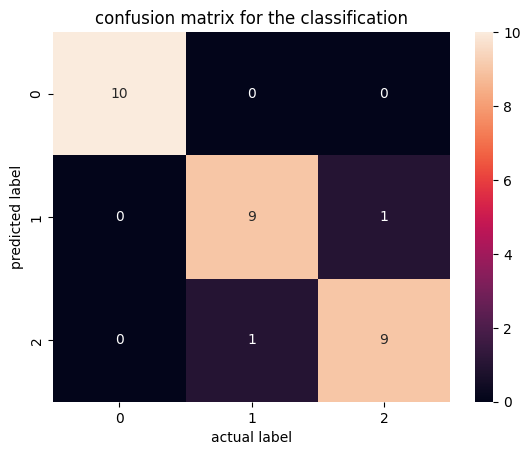

In [28]:
#confusion matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('actual label')
plt.ylabel('predicted label')
plt.title('confusion matrix for the classification')

In [29]:
#classification
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

